In [210]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob

In [211]:
path = os.getenv('HOME') + '/aiffel/DATA'

In [212]:
files = glob.glob(path + '/*needs_merge_327.csv')

In [213]:
files

['/home/seuyon0101/aiffel/DATA/test_results_msp8000_final_needs_merge_327.csv',
 '/home/seuyon0101/aiffel/DATA/test_results_cmsp8000_final_needs_merge_327.csv',
 '/home/seuyon0101/aiffel/DATA/test_results_spm8000_final_needs_merge_327.csv']

In [214]:
results = ['msp','cmsp','spm']

In [215]:
df = pd.read_csv(files[0],usecols=['Unnamed: 0','reg','topic','eng','dial','bleu','pred'], index_col = 'Unnamed: 0')
df.rename(columns={'bleu':'bleu_msp','pred' : 'pred_msp'}, inplace=True)

for file, res in zip(files[1:], results[1:]) :
    temp_ = pd.read_csv(file, usecols=['Unnamed: 0','reg','topic','eng','dial','bleu','pred'], index_col = 'Unnamed: 0')
    temp_.rename(columns={'bleu':f'bleu_{res}','pred' : f'pred_{res}'},inplace=True)
    df = pd.merge(df, temp_.iloc[:,[-1,-2]], right_index=True, left_index=True)
reorder_col = ['reg','topic','eng','dial','pred_spm','pred_msp','pred_cmsp','bleu_spm','bleu_msp','bleu_cmsp']
df = df[reorder_col].copy()

In [216]:
df['tok_len'] = df['eng'].apply(lambda x : len(x.split()))
conditions = [
    (df['tok_len'] <= 5),
    (df['tok_len'] > 5) & (df['tok_len'] <= 10),
    (df['tok_len'] > 10) & (df['tok_len'] <= 15),
    (df['tok_len'] > 15) & (df['tok_len'] <= 20),
    (df['tok_len'] > 20) & (df['tok_len'] <= 25),
    (df['tok_len'] > 25)
    ]
values = [1, 2, 3, 4,5,6]

In [217]:
df['tok_cat'] = np.select(conditions, values)

### overall score
> __bleu\_*max__ _는 epoch 5번까지 돌리고, 긴 시퀀스를 데이터에서 제외하고 돌린 결과임_

In [219]:
bleus=['bleu_spm','bleu_msp','bleu_cmsp']
df[bleus].agg(['mean']).style.background_gradient(cmap='Blues', vmin=0, vmax=20) 

,bleu_spm,bleu_msp,bleu_cmsp
mean,14.060324,15.096059,14.276615


### by region

In [220]:
df.groupby('reg')[bleus].mean().style.background_gradient(cmap='Blues', vmin=0, vmax=20) 

,bleu_spm,bleu_msp,bleu_cmsp
reg,,,
cc,10.823839,10.521975,10.989728
gs,17.369254,15.775978,19.696434
jd,10.442326,11.920957,13.424255
jj,18.520314,20.342869,14.475589
kw,13.145886,16.918515,12.797071


### by tok_len

In [221]:
df.groupby('tok_cat')[bleus].mean().style.background_gradient(cmap='Blues', vmin=0, vmax=15)

,bleu_spm,bleu_msp,bleu_cmsp
tok_cat,,,
1,25.041029,28.499103,19.814600
2,14.149254,14.987535,14.508934
3,11.859820,12.998134,13.728172
4,9.696765,9.801594,11.278902
5,9.785995,10.318615,11.652167
6,12.339038,9.769318,11.129502


### by reg & tok len

In [222]:
df.groupby(['reg','tok_cat'])[bleus].mean().style.background_gradient(cmap='Blues', vmin=0, vmax=15)

### by topic

In [223]:
df.groupby('topic')[bleus].mean().style.background_gradient(cmap='Blues', vmin=0, vmax=30)

,bleu_spm,bleu_msp,bleu_cmsp
topic,,,
가족,13.536697,15.529030,13.684335
건강,12.102183,11.629497,8.377936
게임,11.296500,9.407481,12.739882
경제,24.925979,24.880469,0.000000
계절,13.502928,5.427963,18.532822
군대,8.595871,14.234617,16.960703
꿈(목표),15.445222,12.492620,7.626635
날씨,6.454972,14.620347,14.167552
다이어트,0.000000,0.000000,0.000000


### by reg & topic

In [224]:
df.loc[df.reg =='cc'].groupby(['topic'])[bleus].mean().style.background_gradient(cmap='Blues', vmin=0, vmax=30)

,bleu_spm,bleu_msp,bleu_cmsp
topic,,,
가족,10.278340,7.830277,8.255532
게임,8.042268,7.812895,9.291150
계절,10.855926,10.855926,12.185174
군대,10.569769,12.605968,13.910598
날씨,6.454972,14.620347,14.167552
드라마,0.000000,0.000000,0.000000
만화,6.787683,4.175854,5.625356
먹거리,21.649101,13.832544,13.832544
선물,5.427963,5.408030,0.000000


In [225]:
df.loc[:,['sat_eval1','acc_eval1','sat_eval2','acc_eval2','sat_eval3','acc_eval4']] = np.nan
export_df =df.loc[:,['eng','pred_spm','sat_eval1','acc_eval1','pred_msp','sat_eval2','acc_eval2','pred_cmsp','sat_eval3','acc_eval4']]

In [227]:
# export_df.head()

In [228]:
eval_files = os.listdir(path + '/evaluation')

In [229]:
df_ev = pd.read_excel(path + '/evaluation/' + eval_files[0], index_col = 'Unnamed: 0')

In [230]:
for i,file in enumerate(eval_files[1:]) :
    i +=1
    use_cols=['Unnamed: 0','sat_eval1', 'acc_eval1','sat_eval2','acc_eval2','sat_eval3', 'acc_eval4']
    df_ev_temp = pd.read_excel(path + '/evaluation/' + file, usecols = use_cols, index_col = 'Unnamed: 0')
    df_ev_temp.rename(columns = {'sat_eval1': f'sat_eval1_{i}', 'acc_eval1':f'acc_eval1_{i}', 'sat_eval2': f'sat_eval2_{i}', 'acc_eval2':f'acc_eval2_{i}','sat_eval3': f'sat_eval3_{i}', 'acc_eval4':f'acc_eval3_{i}'},inplace=True)
    df_ev = pd.merge(df_ev, df_ev_temp, right_index =True, left_index=True)

In [231]:
df_ev.columns

Index(['eng', 'pred_spm', 'sat_eval1', 'acc_eval1', 'pred_msp', 'sat_eval2',
       'acc_eval2', 'pred_cmsp', 'sat_eval3', 'acc_eval4', 'sat_eval1_1',
       'acc_eval1_1', 'sat_eval2_1', 'acc_eval2_1', 'sat_eval3_1',
       'acc_eval3_1', 'sat_eval1_2', 'acc_eval1_2', 'sat_eval2_2',
       'acc_eval2_2', 'sat_eval3_2', 'acc_eval3_2', 'sat_eval1_3',
       'acc_eval1_3', 'sat_eval2_3', 'acc_eval2_3', 'sat_eval3_3',
       'acc_eval3_3', 'sat_eval1_4', 'acc_eval1_4', 'sat_eval2_4',
       'acc_eval2_4', 'sat_eval3_4', 'acc_eval3_4'],
      dtype='object')

In [232]:
new_col_order =['eng', 
'pred_spm', 'sat_eval1', 'sat_eval1_1','sat_eval1_2','sat_eval1_3','sat_eval1_4', 
            'acc_eval1', 'acc_eval1_1','acc_eval1_2','acc_eval1_3','acc_eval1_4',
'pred_msp', 'sat_eval2', 'sat_eval2_1','sat_eval2_2','sat_eval2_3','sat_eval2_4', 
            'acc_eval2', 'acc_eval2_1','acc_eval2_2','acc_eval2_3','acc_eval2_4',
'pred_cmsp','sat_eval3', 'sat_eval3_1','sat_eval3_2','sat_eval3_3','sat_eval3_4',  
            'acc_eval4', 'acc_eval3_1','acc_eval3_2','acc_eval3_3','acc_eval3_4']

In [233]:
df_ev['spm_sat_mean'] = df_ev[['sat_eval1', 'sat_eval1_1','sat_eval1_2','sat_eval1_3','sat_eval1_4']].mean(axis=1)
df_ev['spm_acc_mean'] = df_ev[['acc_eval1', 'acc_eval1_1','acc_eval1_2','acc_eval1_3','acc_eval1_4']].mean(axis=1)
df_ev['msp_sat_mean'] = df_ev[['sat_eval2', 'sat_eval2_1','sat_eval2_2','sat_eval2_3','sat_eval2_4']].mean(axis=1)
df_ev['msp_acc_mean'] = df_ev[['acc_eval2', 'acc_eval2_1','acc_eval2_2','acc_eval2_3','acc_eval2_4']].mean(axis=1)
df_ev['cmsp_sat_mean'] = df_ev[['sat_eval3', 'sat_eval3_1','sat_eval3_2','sat_eval3_3','sat_eval3_4']].mean(axis=1)
df_ev['cmsp_acc_mean'] = df_ev[['acc_eval4', 'acc_eval3_1','acc_eval3_2','acc_eval3_3','acc_eval3_4']].mean(axis=1)

In [234]:
final_reorder = ['pred_spm',
'spm_sat_mean','spm_acc_mean',
'pred_msp',
'msp_sat_mean','msp_acc_mean',
'pred_cmsp',
'cmsp_sat_mean','cmsp_acc_mean',]

final_reorder_only_values = [
'spm_sat_mean','spm_acc_mean',
'msp_sat_mean','msp_acc_mean',
'cmsp_sat_mean','cmsp_acc_mean',]

In [235]:
final_df = pd.merge(df, df_ev[final_reorder_only_values], right_index=True, left_index=True)

In [236]:
final_df.columns

Index(['reg', 'topic', 'eng', 'dial', 'pred_spm', 'pred_msp', 'pred_cmsp',
       'bleu_spm', 'bleu_msp', 'bleu_cmsp', 'tok_len', 'tok_cat', 'sat_eval1',
       'acc_eval1', 'sat_eval2', 'acc_eval2', 'sat_eval3', 'acc_eval4',
       'spm_sat_mean', 'spm_acc_mean', 'msp_sat_mean', 'msp_acc_mean',
       'cmsp_sat_mean', 'cmsp_acc_mean'],
      dtype='object')

In [237]:
tokenizers = ['spm','msp','cmsp']
eval_1 = final_df.loc[:,[f'bleu_{tokenizers[0]}',f'{tokenizers[0]}_sat_mean', f'{tokenizers[0]}_acc_mean']].agg('mean').to_frame().transpose().rename(index={0:tokenizers[0]},columns={f'bleu_{tokenizers[0]}':'bleu',f'{tokenizers[0]}_sat_mean':'sat_qual_mean',f'{tokenizers[0]}_acc_mean':'acc_qual_mean'})
for tokenizer in tokenizers[1:] :
    temp = final_df.loc[:,[f'bleu_{tokenizer}',f'{tokenizer}_sat_mean', f'{tokenizer}_acc_mean']].agg('mean').to_frame().transpose().rename(index={0:tokenizer},columns={f'bleu_{tokenizer}':'bleu',f'{tokenizer}_sat_mean':'sat_qual_mean',f'{tokenizer}_acc_mean':'acc_qual_mean'})
    eval_1 = pd.concat([eval_1,temp],axis=0)

In [239]:
eval_1

,bleu,sat_qual_mean,acc_qual_mean
spm,14.060324,3.1120,3.0040
msp,15.096059,3.0096,2.9232
cmsp,14.276615,3.1792,3.1360


In [244]:
qual = ['spm_sat_mean', 'msp_sat_mean', 'cmsp_sat_mean','spm_acc_mean','msp_acc_mean',
        'cmsp_acc_mean']
final_df.groupby('reg')[qual].mean().style.background_gradient(cmap='Blues', vmin=2.5, vmax=4) 

,spm_sat_mean,msp_sat_mean,cmsp_sat_mean,spm_acc_mean,msp_acc_mean,cmsp_acc_mean
reg,,,,,,
cc,3.128000,3.024000,3.200000,2.976000,2.944000,3.272000
gs,3.352000,3.168000,3.472000,3.292000,3.088000,3.464000
jd,3.016000,2.712000,3.144000,2.904000,2.616000,3.144000
jj,3.120000,3.088000,3.080000,2.912000,2.952000,3.032000
kw,2.944000,3.056000,3.000000,2.936000,3.016000,2.768000


In [248]:
final_df.groupby('reg')[bleus].mean().style.background_gradient(cmap='Blues', vmin=0, vmax=20) 

,bleu_spm,bleu_msp,bleu_cmsp
reg,,,
cc,10.823839,10.521975,10.989728
gs,17.369254,15.775978,19.696434
jd,10.442326,11.920957,13.424255
jj,18.520314,20.342869,14.475589
kw,13.145886,16.918515,12.797071


In [259]:
df.columns.str.contains('pred')

array([False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False])

In [269]:
final_df.loc[(final_df.bleu_spm > final_df.bleu_cmsp),['eng','pred_spm','bleu_spm','pred_msp','bleu_msp','pred_cmsp','bleu_cmsp']]

,eng,pred_spm,bleu_spm,pred_msp,bleu_msp,pred_cmsp,bleu_cmsp
230919.0,<jd> These days when it comes to historical dr...,요즘 사극이라고 하면 다 사형 역활을 하거나잉 사극적인 사극들을,22.459233,요새 역사 드라마를 보먼은 다 뭐 츄리닝이나 뭐 짧게 짧게,10.855926,요즘 사극들이라고 하며는 다 사극이나 사극 드라마나 짧은 게 나오,14.287202
8596.0,"<jd> By about ten o'clock or eleven o'clock, y...",시계 열 시 요법이나 열한 시나 깨는 깨소 이런 거.,13.843886,한 시 열 시 한 시 한 시 한 시 한 시 한 시 한 시 되면,7.327912,한 열 시 정도에 한 열 시 정도 되면 한 시점 열 시 되면,10.694730
6353.0,"<jd> Well, if you look at people who are very ...",아주 잘 빨아 가는 디 보면 우리 동서들 진짜 똑같애브러 언니.,8.201060,되게 잘생겨요잉 애기들 보면 진짜 우리 언니가 같이 똑같은 애들 먹잖아.,8.201060,진짜 애기들이 애기를 닮아갖고 먹는 애기들이 똑같은 거 보믄은 나도 우리 언니가.,8.182478
772660.0,<jd> There are so many restrictions on the par...,지원을 받칠 수 있는 이런 제한 제한이 너무 많아 가꾸,15.352598,받을 수 있는 부분에서 쪼끔 이케 제약이 많은,22.811360,부품에 브러갓고 제약이 너무 많애갖고,10.796528
4190.0,<jd> Or you don't let go of what you like to d...,뭐~ 좋아하는 거 뭐 좋아하는 거 뭐 이르케 뭐 좋아하는 거 놓지 말고 할 수 있게끄름,12.126781,싫은 걸 하믄서 좋아하는 거를 하믄 안 하고 글면 하는 거야.,10.600313,뭐~ 하는 것을 이르케 막 이르케 하는 것을 이르케 놔뚜고 그 다음은,0.000000
906848.0,<jj> Will it be dying without that salt?,소금 안 깨고 죽으켜?,19.672556,그 소금 안 담아도 죽어지는 거?,25.276008,그 소금 안 찍엉 죽어질 거 아니?,18.277761
259192.0,"<jj> Oh, I'm gonna run some tests.",아 나 테스트하는 것도 이,19.672556,아 아이덜이 검사를 해보라 게,19.672556,아 무슨 검사할 거 아니께. 아 나,16.515822
808387.0,<jj> Then in the past,그 다음은 옛날엔게,34.787006,그 옛날엔게,26.013005,그 옛날엔게,26.013005
254952.0,"<jj> I'm just saying, ""What's going on?""",그냥 뭐 어떵 행 뭐행 하*는 거?,10.855926,막 말하는 것도 막 이?,11.786768,그냥 뭐랜 한 거는 그냥 이?,10.520696
204242.0,<jj> It was really good,진짜 맛있언,60.653066,진짜 맛있언,60.653066,잘도 좋안,0.000000


In [270]:
final_df.loc[(final_df.spm_sat_mean > final_df.cmsp_sat_mean),['eng','pred_spm','bleu_spm','pred_msp','bleu_msp','pred_cmsp','bleu_cmsp']]

,eng,pred_spm,bleu_spm,pred_msp,bleu_msp,pred_cmsp,bleu_cmsp
53200.0,<jd> What's a startup?,스타트업 뭐시기냐?,0.000000,시업이 뭐냐?,0.000000,스타트업 뭐시냐?,0.000000
723370.0,<jd> I wink Ill study a little like this.,쫌 이케 공부도 쫌 공부도 쫌 하고 이런 편입니다,12.185174,아이병원이나 이런 거 쫌 공부를 잘하,22.957488,좋은 시디야 같은 거를 쫌 공부를 했,19.205613
8596.0,"<jd> By about ten o'clock or eleven o'clock, y...",시계 열 시 요법이나 열한 시나 깨는 깨소 이런 거.,13.843886,한 시 열 시 한 시 한 시 한 시 한 시 한 시 한 시 되면,7.327912,한 열 시 정도에 한 열 시 정도 되면 한 시점 열 시 되면,10.694730
286387.0,<jd> Itas selected,뽑혀가지고,0.000000,선택을 해 ⁇ 는디,0.000000,선택을 해 가지고,0.000000
6353.0,"<jd> Well, if you look at people who are very ...",아주 잘 빨아 가는 디 보면 우리 동서들 진짜 똑같애브러 언니.,8.201060,되게 잘생겨요잉 애기들 보면 진짜 우리 언니가 같이 똑같은 애들 먹잖아.,8.201060,진짜 애기들이 애기를 닮아갖고 먹는 애기들이 똑같은 거 보믄은 나도 우리 언니가.,8.182478
16040.0,<jd> I wish I could get back together.,아이쇼핑도 다시 하면 좋을 텐디.,0.000000,아이 아이 아이 아이 아이 아이 아이 아이 나믄,0.000000,아이 돌아오게 되면 좋게 좋게 좋,0.000000
772660.0,<jd> There are so many restrictions on the par...,지원을 받칠 수 있는 이런 제한 제한이 너무 많아 가꾸,15.352598,받을 수 있는 부분에서 쪼끔 이케 제약이 많은,22.811360,부품에 브러갓고 제약이 너무 많애갖고,10.796528
897956.0,<jd> I went there Hoian but I cant remember it...,그~ 호주로 갔는디 지나놓고 지낸 뒤에 생각나제 모다네,9.757125,사성사르케 갔다 왔는디 아는 세월이 지나서,8.389862,가서 가봤는디 사년이 지나놓고 나서 기억이 안 나는디,19.660764
22092.0,<jd> I'm going. I'm scared. I need to hear som...,갈망 이드끼도 되게 뭔가 뭔가 뭔가 뭔가 듣기 시작이 필요혀,0.000000,아이 겁나 좋아했어야이 애기들도 쫌 특이한 거 들어봐야 알,0.000000,가는 거 좋은 거는 에이아이가 너무 무서워가지고 가는 거,0.000000
41305.0,<jd> I've got it in the early 200 millionth ce...,아이 아이 조기 백구십구 세기를 초반에 땄다,0.000000,아이한테는 일찍 받았어야이 이백만 원 이,0.000000,초기 초에서 초기에서 구했어.,0.000000


In [69]:
# export_df.to_excel('saturi_evaluation_0328.xlsx')

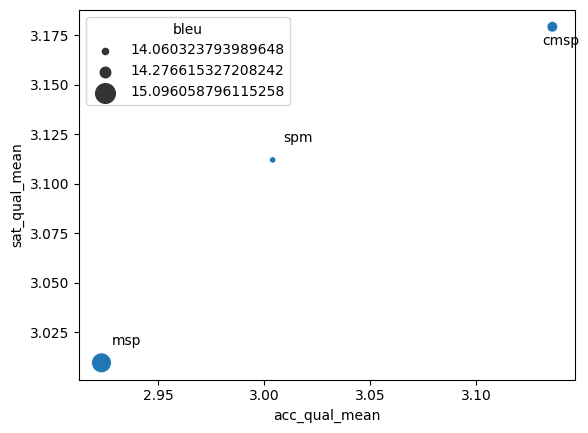

In [238]:
import seaborn as sns
fig = plt.figure()
ax = sns.scatterplot(data = eval_1, x='acc_qual_mean',y='sat_qual_mean', size='bleu',sizes=(20,200),legend=True)
for i in range(len(eval_1)) :
    t = 1
    if i == 2 :
        t *= -1
    ax.text(eval_1['acc_qual_mean'][i]+0.005 *t ,eval_1['sat_qual_mean'][i] +0.009*t , eval_1.index[i])